# Telco Customer Churn
### Created By : Asadany

## Business Problem Understanding

**Context**  
Sebuah perusahaan telekomunikasi sedang menganalisa untuk mengurangi kemungkinan pemberhentian langganan layanannya dengan mengalisa data pelanggan untuk mengetahui pola atau variabel apa saja yang paling mempengaruhi orang untuk melakukan pemberhentian langanan, dengan begitu perusahaan dapat mengetahui pelanggan mana yang akan berhenti atau melanjutkan langganan

Target :

0 : Berhenti Berlangganan

1 : Melanjutkan berlangganan

**Problem Statement :**

Pada Perusahaan Telco, menjaga pelanggan untuk tetap berlangganan adalah hal yang sangat penting dan merupakan kunci cost effective dibandingkan jika meng acquirer pelanggan baru yang cost nya lebih besar

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memprediksi berapa banyak pelanggan yang akan berhenti berlangganan dan perusahaan dapat fokus pada pelanggan yang akan  
Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang kandidat akan/ingin bekerja pada perusahaan tersebut atau tidak, sehingga dapat memfokuskan rekrutmen pada kandidat yang bersedia bekerja pada perusahaan tersebut.

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang kandidat mau bekerja untuk mereka atau tidak, sehingga mereka dapat membuat rencana yang lebih baik dalam mendekati kandidat potensial (kandidat yang ingin bekerja untuk mereka/perusahaan) .

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang untuk mengetahui kemungkinan customer akan melakukan churn atau tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang customer yang perlu dilakukan pendekatan agar tidak churn.

**Metric Evaluation**

Type 1 error : False Positive  
Konsekuensi: sia-sianya biaya perekrutan, waktu dan sumber daya

Type 2 error : False Negative  
Konsekuensi: kehilangan calon potensial 

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost perekrutan dari perusahaan tersebut, tetapi tanpa membuat menjadi kurangnya/tidak cukup kandidat potensial yang dibutuhkan perusahaan. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Jadi nanti metric utama yang akan kita gunakan adalah roc_auc.

## Data Understanding

Dataset source : https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

Note : 
- Dataset tidak seimbang
- Sebagian besar fitur bersifat kategori (Nominal, Ordinal, Binary), beberapa dengan kardinalitas tinggi
- Setiap baris data merepresentasikan informasi seorang kandidat yang ditawarkan bekerja dimasa lalu

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Dependents | Object type | representing whether the customer has dependents (e.g., Yes/No) |
| tenure | Integer type | representing the tenure of the customer in months |
| OnlineSecurity | Object type | indicating whether the customer has online security service (e.g., Yes/No) |
| OnlineBackup | Object type | indicating whether the customer has online backup service (e.g., Yes/No) |
| InternetService | Object type | representing the type of internet service the customer uses (e.g., DSL, Fiber optic) |
| DeviceProtection | Object type | indicating whether the customer has device protection service (e.g., Yes/No) |
| TechSupport | Object type | indicating whether the customer has technical support service (e.g., Yes/No) |
| Contract | Object type | representing the type of contract the customer has (e.g., One year, Month-to-month) |
| PaperlessBilling | Object type | indicating whether the customer has opted for paperless billing (e.g., Yes/No) |
| MonthlyCharges | Float type | representing the monthly charges for the customer |
| Churn | Object type | indicating whether the customer has churned (e.g., Yes/No) |

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score



# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
#Load Dataset
df = pd.read_csv("data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


## Data Cleaning

Pengecekan kembali apakaha ada data kosong di setiap variabel

In [4]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[57, 26]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, Yes]"
4,InternetService,object,0,0.0,3,"[No, Fiber optic]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service]"
6,TechSupport,object,0,0.0,3,"[Yes, No]"
7,Contract,object,0,0.0,3,"[One year, Two year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[54.55, 42.35]"


Dikarenakan tidak ada data yang kosong maka tidak ada data yang di drop

Mari kita check informasi dataframenya lagi

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[15, 47]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No]"
3,OnlineBackup,object,0,0.0,3,"[Yes, No internet service]"
4,InternetService,object,0,0.0,3,"[No, DSL]"
5,DeviceProtection,object,0,0.0,3,"[No, No internet service]"
6,TechSupport,object,0,0.0,3,"[No internet service, Yes]"
7,Contract,object,0,0.0,3,"[One year, Month-to-month]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[107.7, 85.75]"


data terlihat sudah baik

#### Matrix Plot

<Axes: >

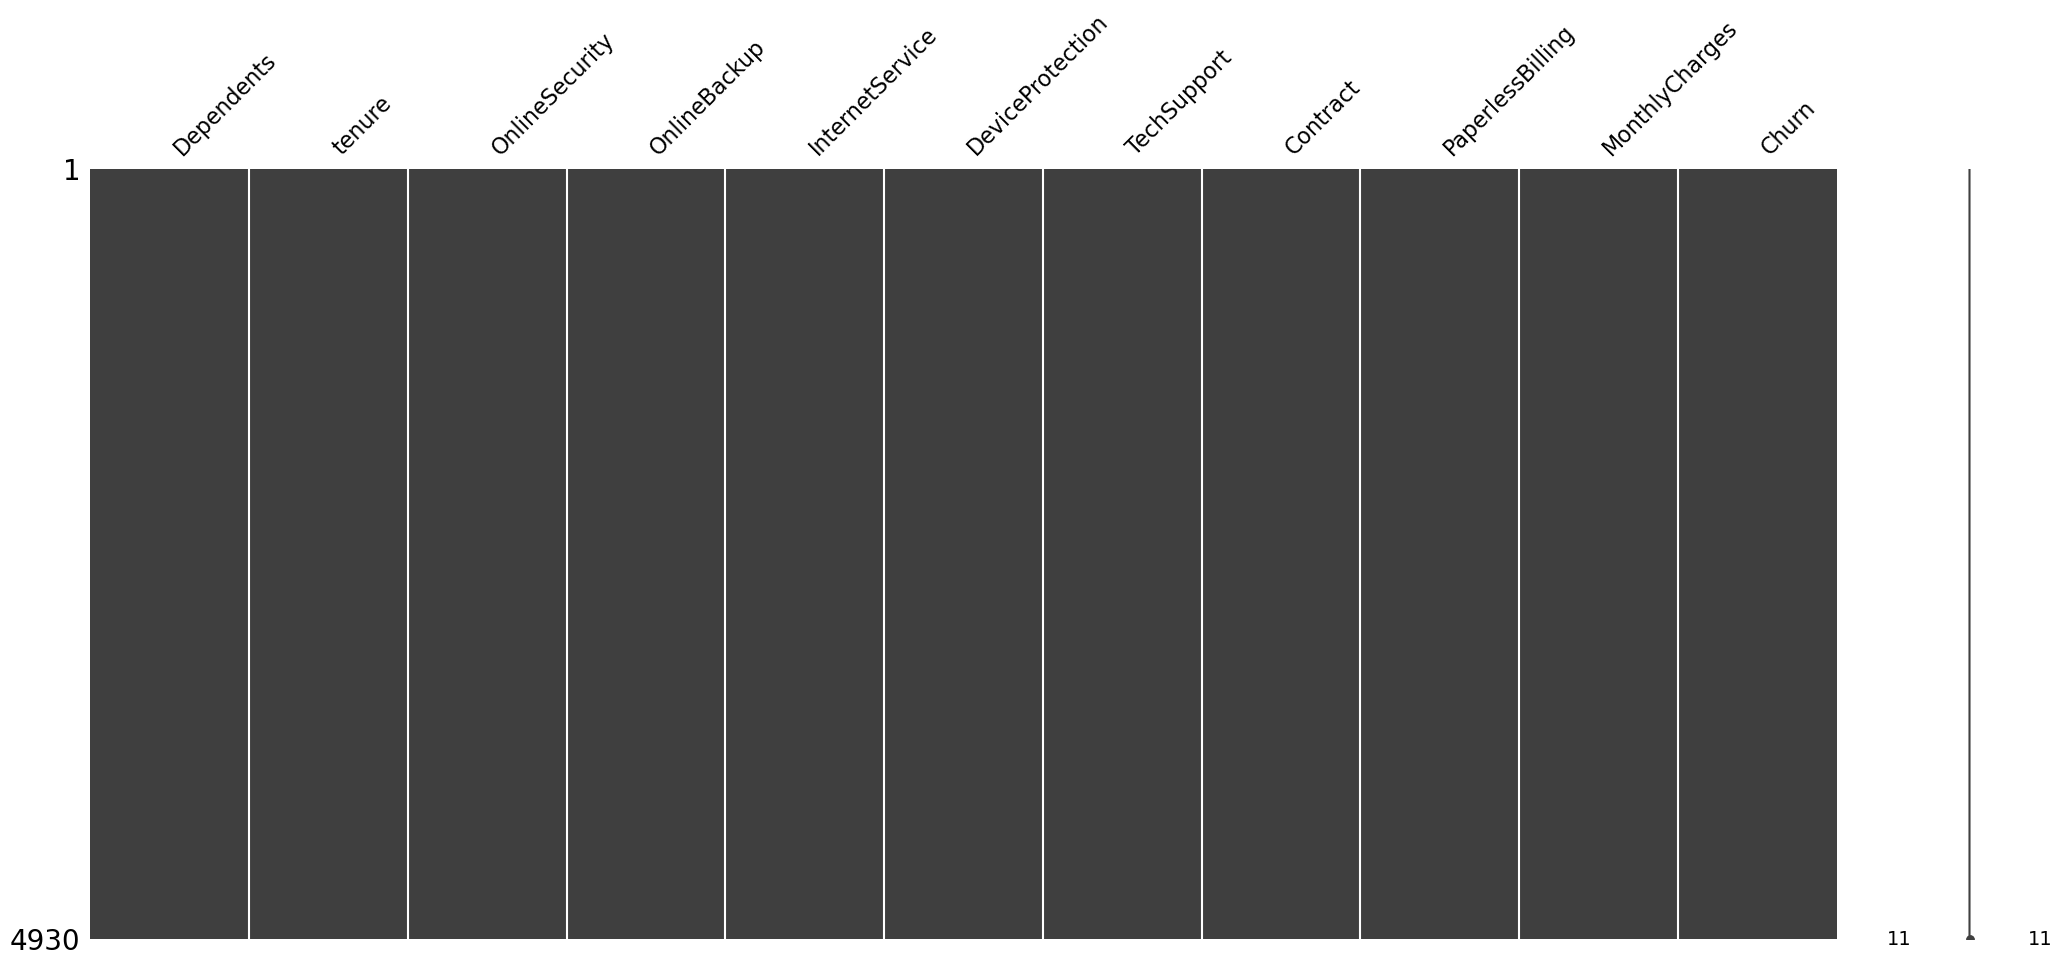

In [7]:
missingno.matrix(df)

Terlihat bahwa tidak ada missing value/data yang hilang pada setiap kolom 

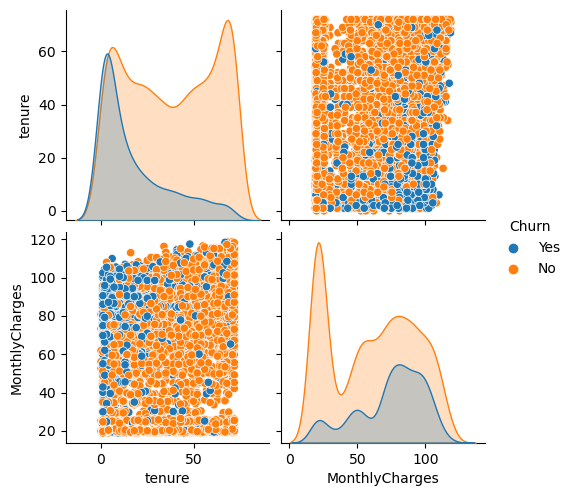

In [8]:
sns.pairplot(df, hue='Churn')
plt.show()

Data terlihat bahwa Tenure semakin pendek dan monthly charge semakin besar membuat seseorang akan melakukan churn

In [9]:
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [11]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [12]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

Accuracy: 0.755578093306288
              precision    recall  f1-score   support

          No       0.79      0.88      0.84       695
         Yes       0.62      0.45      0.52       291

    accuracy                           0.76       986
   macro avg       0.71      0.67      0.68       986
weighted avg       0.74      0.76      0.74       986



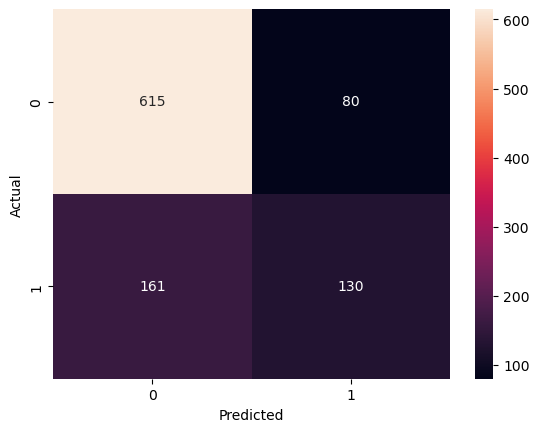

In [13]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
df_model = df.copy()

In [16]:
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [20]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr(method='spearman')

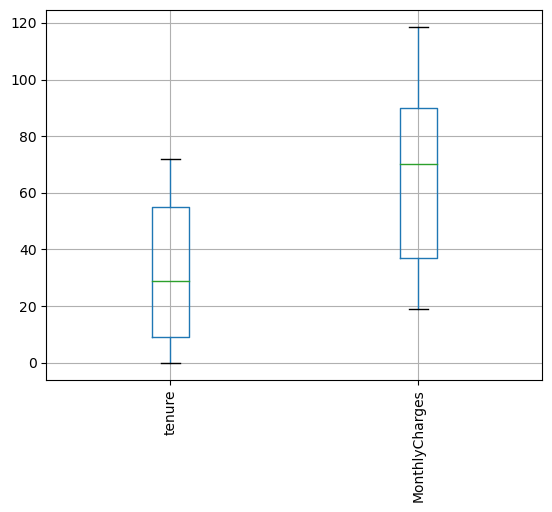

In [18]:
df_model.boxplot(rot=90);

<Axes: >

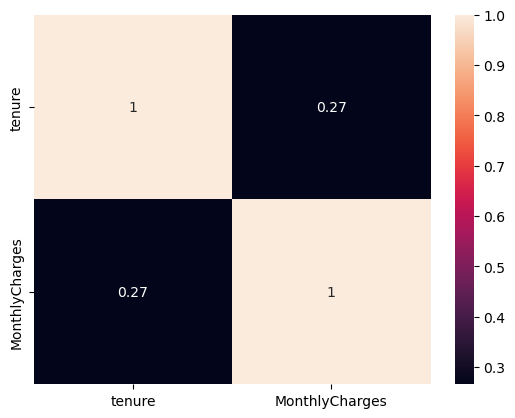

In [70]:
sns.heatmap(numeric_df.corr(method='spearman'), annot=True)

In [18]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [23]:
df['Churn'].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

In [25]:
df['Churn'].value_counts()/len(df['Churn']) * 100

Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64

Sekitar 73% tetap berlangganan dan hanya 26% saja yang melakukan churn

##### Categorical Features Distribution

In [26]:
df.describe(include=['O'])

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


ok sekarang data yang kita miliki sudah bersih, mari sekarang kita lanjut ke tahap Analisa Datanya untuk keperluan masalah kita.

## Data Analysis

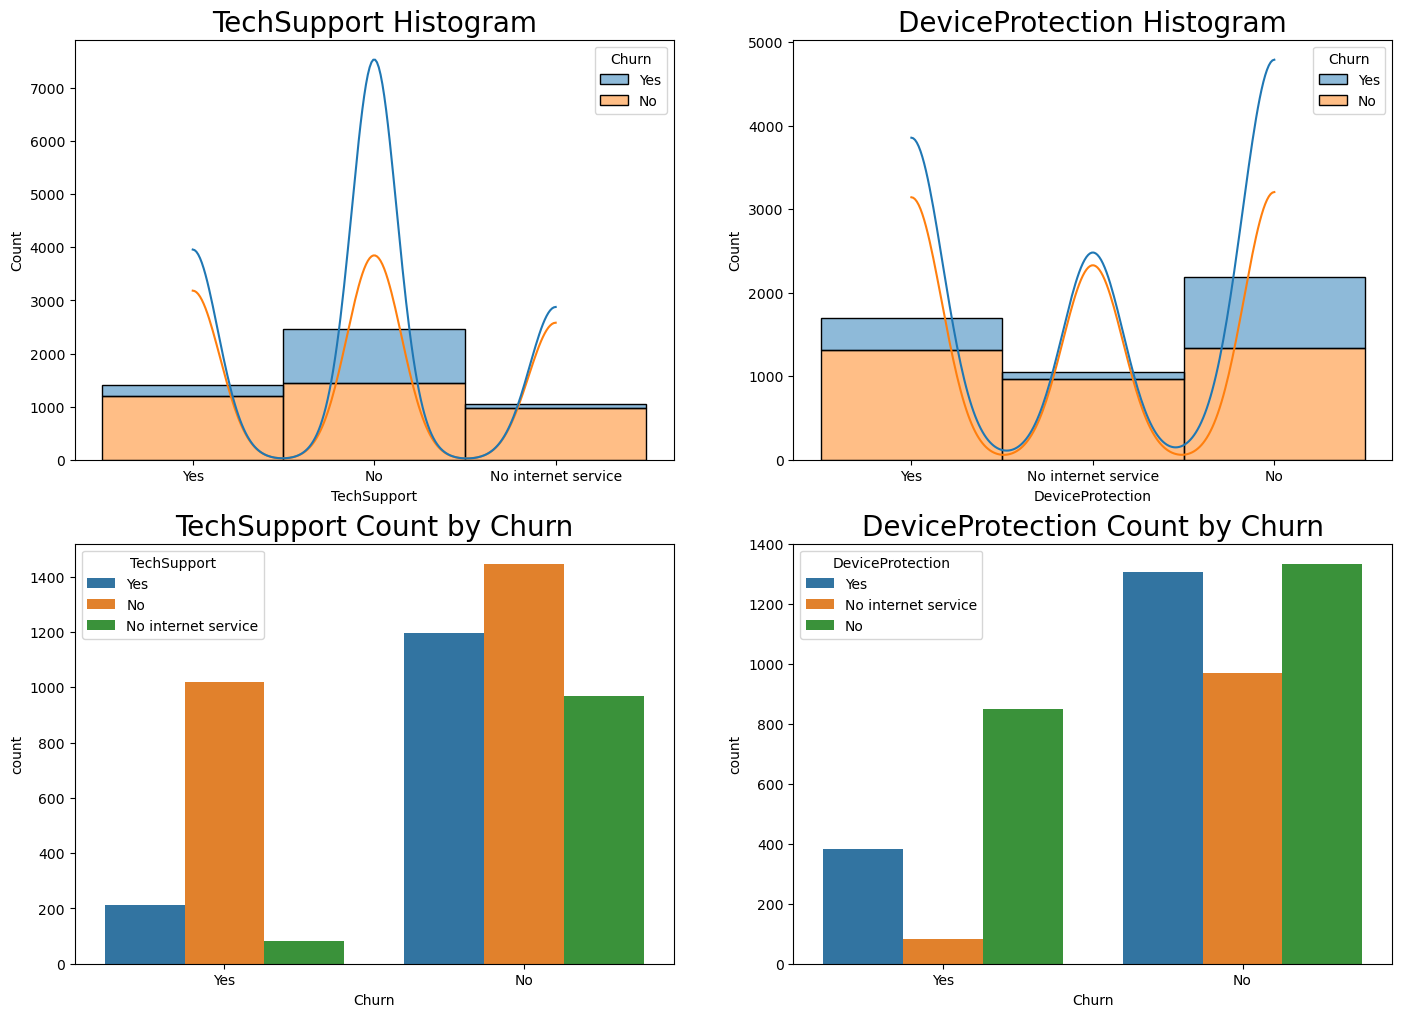

In [28]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df, x='TechSupport', hue='Churn', kde=True, multiple='stack')
plt.title('TechSupport Histogram', fontsize=20)

plt.subplot(222)
sns.histplot(data=df, x='DeviceProtection', hue='Churn', kde=True, multiple='stack')
plt.title('DeviceProtection Histogram', fontsize=20)

plt.subplot(223)
sns.countplot(data=df, x='Churn', hue='TechSupport')
plt.title('TechSupport Count by Churn', fontsize=20)

plt.subplot(224)
sns.countplot(data=df, x='Churn', hue='DeviceProtection')
plt.title('DeviceProtection Count by Churn', fontsize=20)

plt.show()

Berdasarkan histogram dan boxplot diatas, kita dapat menyimpulkan bahwa terlihat perbedaan distribusi antara pengguna 'TechSupport' dan Device Protection dan tidak mayoritas pengguna layanan tersebut memiliki churn yang lebih sedikit sementara yang tidak menggunakan layanan memiliki churn yang lebih banyak


## Data Preparation 

In [29]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


Accuracy: 0.7677484787018256
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       695
           1       0.65      0.46      0.54       291

    accuracy                           0.77       986
   macro avg       0.72      0.68      0.69       986
weighted avg       0.75      0.77      0.75       986



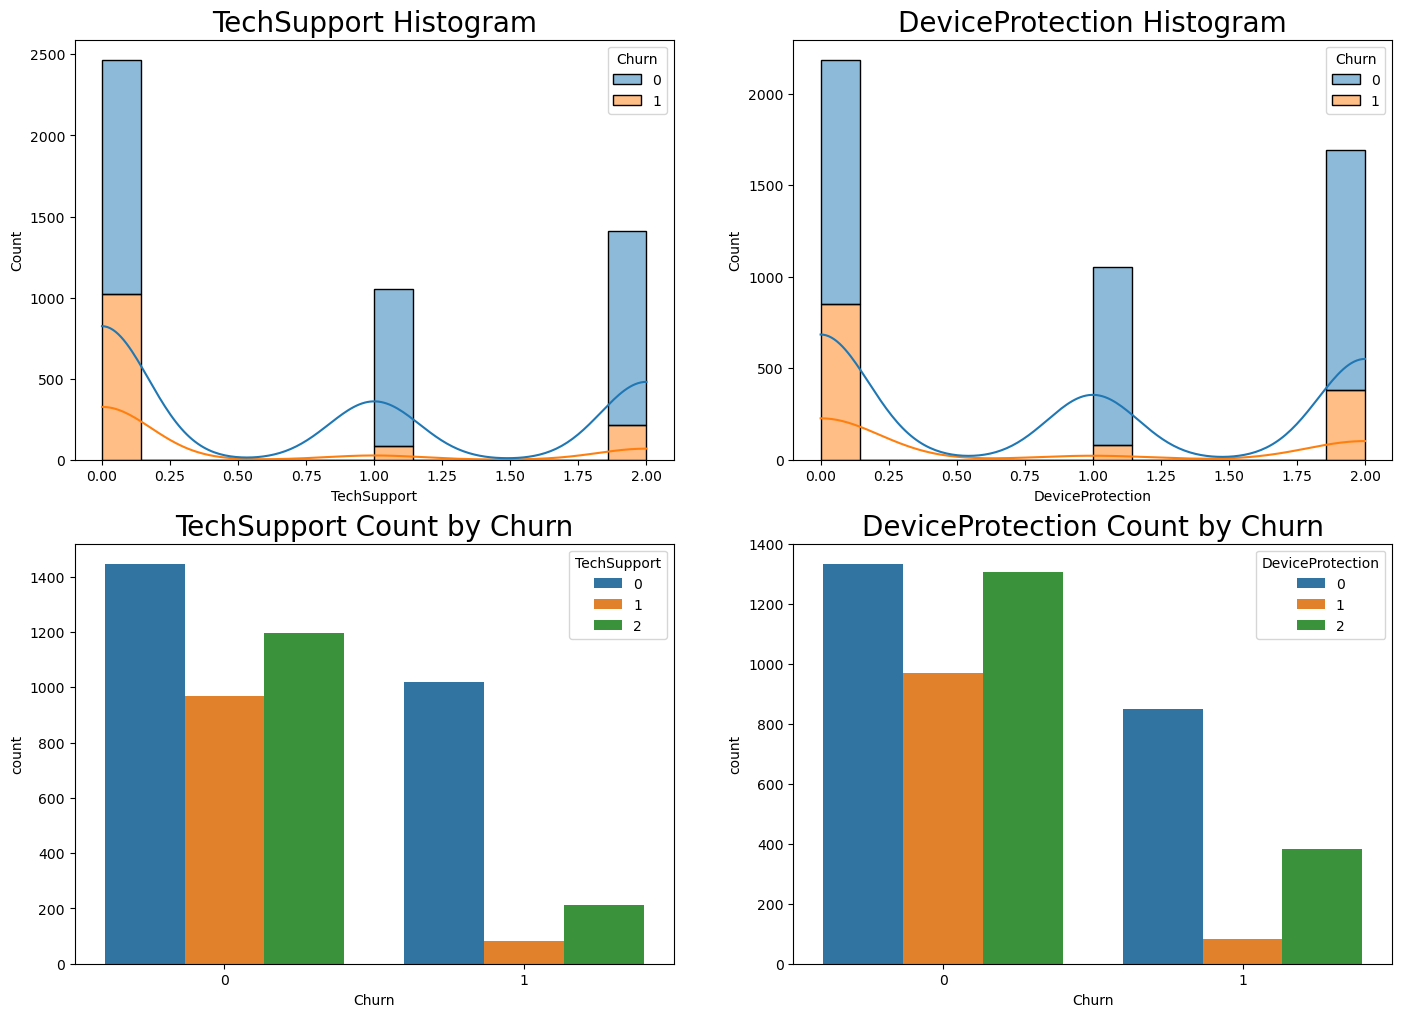

In [32]:
df = pd.DataFrame(df_model)

# Encoding categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split data into training and testing sets
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# EDA Visualizations
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df, x='TechSupport', hue='Churn', kde=True, multiple='stack')
plt.title('TechSupport Histogram', fontsize=20)

plt.subplot(222)
sns.histplot(data=df, x='DeviceProtection', hue='Churn', kde=True, multiple='stack')
plt.title('DeviceProtection Histogram', fontsize=20)

plt.subplot(223)
sns.countplot(data=df, x='Churn', hue='TechSupport')
plt.title('TechSupport Count by Churn', fontsize=20)

plt.subplot(224)
sns.countplot(data=df, x='Churn', hue='DeviceProtection')
plt.title('DeviceProtection Count by Churn', fontsize=20)

plt.show()

In [68]:
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,1,9,0,0,0,2,2,0,1,72.90,1
1,0,14,0,2,1,2,0,0,1,82.65,0
2,0,64,2,0,0,2,2,2,0,47.85,1
3,0,72,2,2,0,2,2,2,0,69.65,0
4,0,3,1,1,2,1,1,0,1,23.60,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,0,15,0,0,1,2,2,0,1,103.45,0
4926,1,10,0,0,1,2,2,0,1,91.10,0
4927,0,58,1,1,2,1,1,2,0,20.75,0
4928,0,1,0,0,1,0,0,0,1,69.75,1


In [72]:
data_numeric = pd.get_dummies(data, columns = ['Dependents','Contract','PaperlessBilling'])

In [73]:

data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tenure                   4930 non-null   int64  
 1   OnlineSecurity           4930 non-null   object 
 2   OnlineBackup             4930 non-null   object 
 3   InternetService          4930 non-null   object 
 4   DeviceProtection         4930 non-null   object 
 5   TechSupport              4930 non-null   object 
 6   MonthlyCharges           4930 non-null   float64
 7   Dependents_No            4930 non-null   bool   
 8   Dependents_Yes           4930 non-null   bool   
 9   Contract_Month-to-month  4930 non-null   bool   
 10  Contract_One year        4930 non-null   bool   
 11  Contract_Two year        4930 non-null   bool   
 12  PaperlessBilling_No      4930 non-null   bool   
 13  PaperlessBilling_Yes     4930 non-null   bool   
dtypes: bool(7), float64(1), 

In [74]:
categorical_cols = ['OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Handling missing values (if any)
# For demonstration, let's assume you have missing values in the 'MonthlyCharges' column
# You can use mean imputation
df_encoded['MonthlyCharges'].fillna(df_encoded['MonthlyCharges'].mean(), inplace=True)

# Splitting features and target variable
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

In [75]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tenure                   4930 non-null   int64  
 1   OnlineSecurity           4930 non-null   object 
 2   OnlineBackup             4930 non-null   object 
 3   InternetService          4930 non-null   object 
 4   DeviceProtection         4930 non-null   object 
 5   TechSupport              4930 non-null   object 
 6   MonthlyCharges           4930 non-null   float64
 7   Dependents_No            4930 non-null   bool   
 8   Dependents_Yes           4930 non-null   bool   
 9   Contract_Month-to-month  4930 non-null   bool   
 10  Contract_One year        4930 non-null   bool   
 11  Contract_Two year        4930 non-null   bool   
 12  PaperlessBilling_No      4930 non-null   bool   
 13  PaperlessBilling_Yes     4930 non-null   bool   
dtypes: bool(7), float64(1), 

In [77]:
for column in data_numeric.columns:
    unique_values = data_numeric[column].unique()
    print(f"Column '{column}' unique values: {unique_values}")

Column 'tenure' unique values: [ 9 14 64 72  3 40 17 11  8 47 18  5  1 48 13 58  7  4 70 34 31 37 15 71
 10 43 22 33 69 54 63 55 66 56 32 26 24  2 51 23 49 28 36 45 42  6 61 59
 67 65  0 16 52 41 25 62 20 50 30 60 19 35 57 27 44 53 12 46 39 29 38 68
 21]
Column 'OnlineSecurity' unique values: ['No' 'Yes' 'No internet service']
Column 'OnlineBackup' unique values: ['No' 'Yes' 'No internet service']
Column 'InternetService' unique values: ['DSL' 'Fiber optic' 'No']
Column 'DeviceProtection' unique values: ['Yes' 'No internet service' 'No']
Column 'TechSupport' unique values: ['Yes' 'No' 'No internet service']
Column 'MonthlyCharges' unique values: [ 72.9   82.65  47.85 ...  58.45  23.65 108.5 ]
Column 'Dependents_No' unique values: [False  True]
Column 'Dependents_Yes' unique values: [ True False]
Column 'Contract_Month-to-month' unique values: [ True False]
Column 'Contract_One year' unique values: [False  True]
Column 'Contract_Two year' unique values: [False  True]
Column 'PaperlessBi

In [82]:

data_train = data_numeric

In [83]:

data_train.head()

,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,MonthlyCharges,Dependents_No,Dependents_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes
0,9,No,No,DSL,Yes,Yes,72.90,False,True,True,False,False,False,True
1,14,No,Yes,Fiber optic,Yes,No,82.65,True,False,True,False,False,False,True
2,64,Yes,No,DSL,Yes,Yes,47.85,True,False,False,False,True,True,False
3,72,Yes,Yes,DSL,Yes,Yes,69.65,True,False,False,False,True,True,False
4,3,No internet service,No internet service,No,No internet service,No internet service,23.60,True,False,True,False,False,False,True


In [94]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to remaining categorical columns
remaining_categorical_columns = ['Dependents', 'Contract', 'PaperlessBilling', 'Churn']
for col in remaining_categorical_columns:
    df_model[col] = label_encoder.fit_transform(df_model[col])

In [95]:
df_model.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,1,9,0,0,0,2,2,0,1,72.90,1
1,0,14,0,2,1,2,0,0,1,82.65,0
2,0,64,2,0,0,2,2,2,0,47.85,1
3,0,72,2,2,0,2,2,2,0,69.65,0
4,0,3,1,1,2,1,1,0,1,23.60,0


In [96]:
X = df_model.drop(columns=['Churn'])
y = df_model['Churn']

# Print Shape
print('Shape Feature Columns: ',X.shape)
print('Shape Target Columns: ', y.shape)
     

Shape Feature Columns:  (4930, 10)
Shape Target Columns:  (4930,)


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Splitting X dan y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 672)

# Print Shape
print('Shape X_train: ',X_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape X_test: ', X_test.shape)
print('Shape y_test: ', y_test.shape)


Shape X_train:  (3451, 10)
Shape y_train:  (3451,)
Shape X_test:  (1479, 10)
Shape y_test:  (1479,)


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Splitting X dan y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 672)

# Print Shape
print('Shape X_train: ',X_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape X_test: ', X_test.shape)
print('Shape y_test: ', y_test.shape)


Shape X_train:  (3451, 10)
Shape y_train:  (3451,)
Shape X_test:  (1479, 10)
Shape y_test:  (1479,)


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Splitting X dan y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 672)

# Print Shape
print('Shape X_train: ',X_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape X_test: ', X_test.shape)
print('Shape y_test: ', y_test.shape)


Shape X_train:  (3451, 10)
Shape y_train:  (3451,)
Shape X_test:  (1479, 10)
Shape y_test:  (1479,)


In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define classifiers
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

# Initialize lists to store performance metrics
training_accuracy = []
testing_accuracy = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Append each score to the respective list
    training_accuracy.append(clf.score(X_train, y_train))
    testing_accuracy.append(clf.score(X_test, y_test))

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

In [102]:
data_class = {'Model':['K-Nearest Neighbors (KNN)', 'Support Vector Machine (SVM)', 'Logistic Regression', 'Random Forest','Adaptive Boosting (Adaboost)','Extreme Gradient Boosting (XGB)'], 'Training Accuracy':training_accuracy, 'Testing Accuracy':testing_accuracy, 
              'Accuracy Score':accuracy_score, 'Precision Score':precision_score, 'Recall Score':recall_score, 'F1 Score':f1_score}
data_class = pd.DataFrame(data_class)

In [104]:

metrics = {
    'Accuracy Score': accuracy_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
    'F1 Score': f1_scores
}

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': [
        'K-Nearest Neighbors (KNN)',
        'Support Vector Machine (SVM)',
        'Logistic Regression',
        'Random Forest',
        'Adaptive Boosting (Adaboost)',
        'Extreme Gradient Boosting (XGB)'
    ],
    'Training Accuracy': training_accuracy,
    'Testing Accuracy': testing_accuracy,
    **metrics  # Unpack the metrics dictionary
})

# Display the DataFrame
print(results_df)

                             Model  Training Accuracy  Testing Accuracy  \
0        K-Nearest Neighbors (KNN)           0.835990          0.757945   
1     Support Vector Machine (SVM)           0.793973          0.775524   
2              Logistic Regression           0.797450          0.789047   
3                    Random Forest           0.993045          0.777552   
4     Adaptive Boosting (Adaboost)           0.809331          0.797836   
5  Extreme Gradient Boosting (XGB)           0.923211          0.769439   

   Accuracy Score  Precision Score  Recall Score  F1 Score  
0        0.757945         0.574344      0.481663  0.523936  
1        0.775524         0.652174      0.403423  0.498489  
2        0.789047         0.649231      0.515892  0.574932  
3        0.777552         0.629032      0.476773  0.542420  
4        0.797836         0.675159      0.518337  0.586445  
5        0.769439         0.603030      0.486553  0.538566  


In [105]:

identitas_pengguna = df.iloc[:,1:6]
identitas_pengguna.head()

,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection
0,9,0,0,0,2
1,14,0,2,1,2
2,64,2,0,0,2
3,72,2,2,0,2
4,3,1,1,2,1


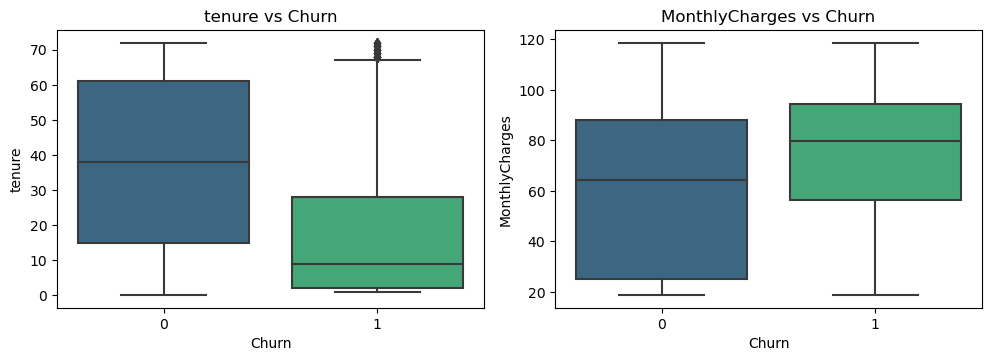

<Figure size 1500x1000 with 0 Axes>

In [111]:
# Plot relationships between numerical features and the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Churn', y=col, data=df_model, palette='viridis')
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

# Plot relationships between categorical features and the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, hue='Churn', data=df_model, palette='viridis')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

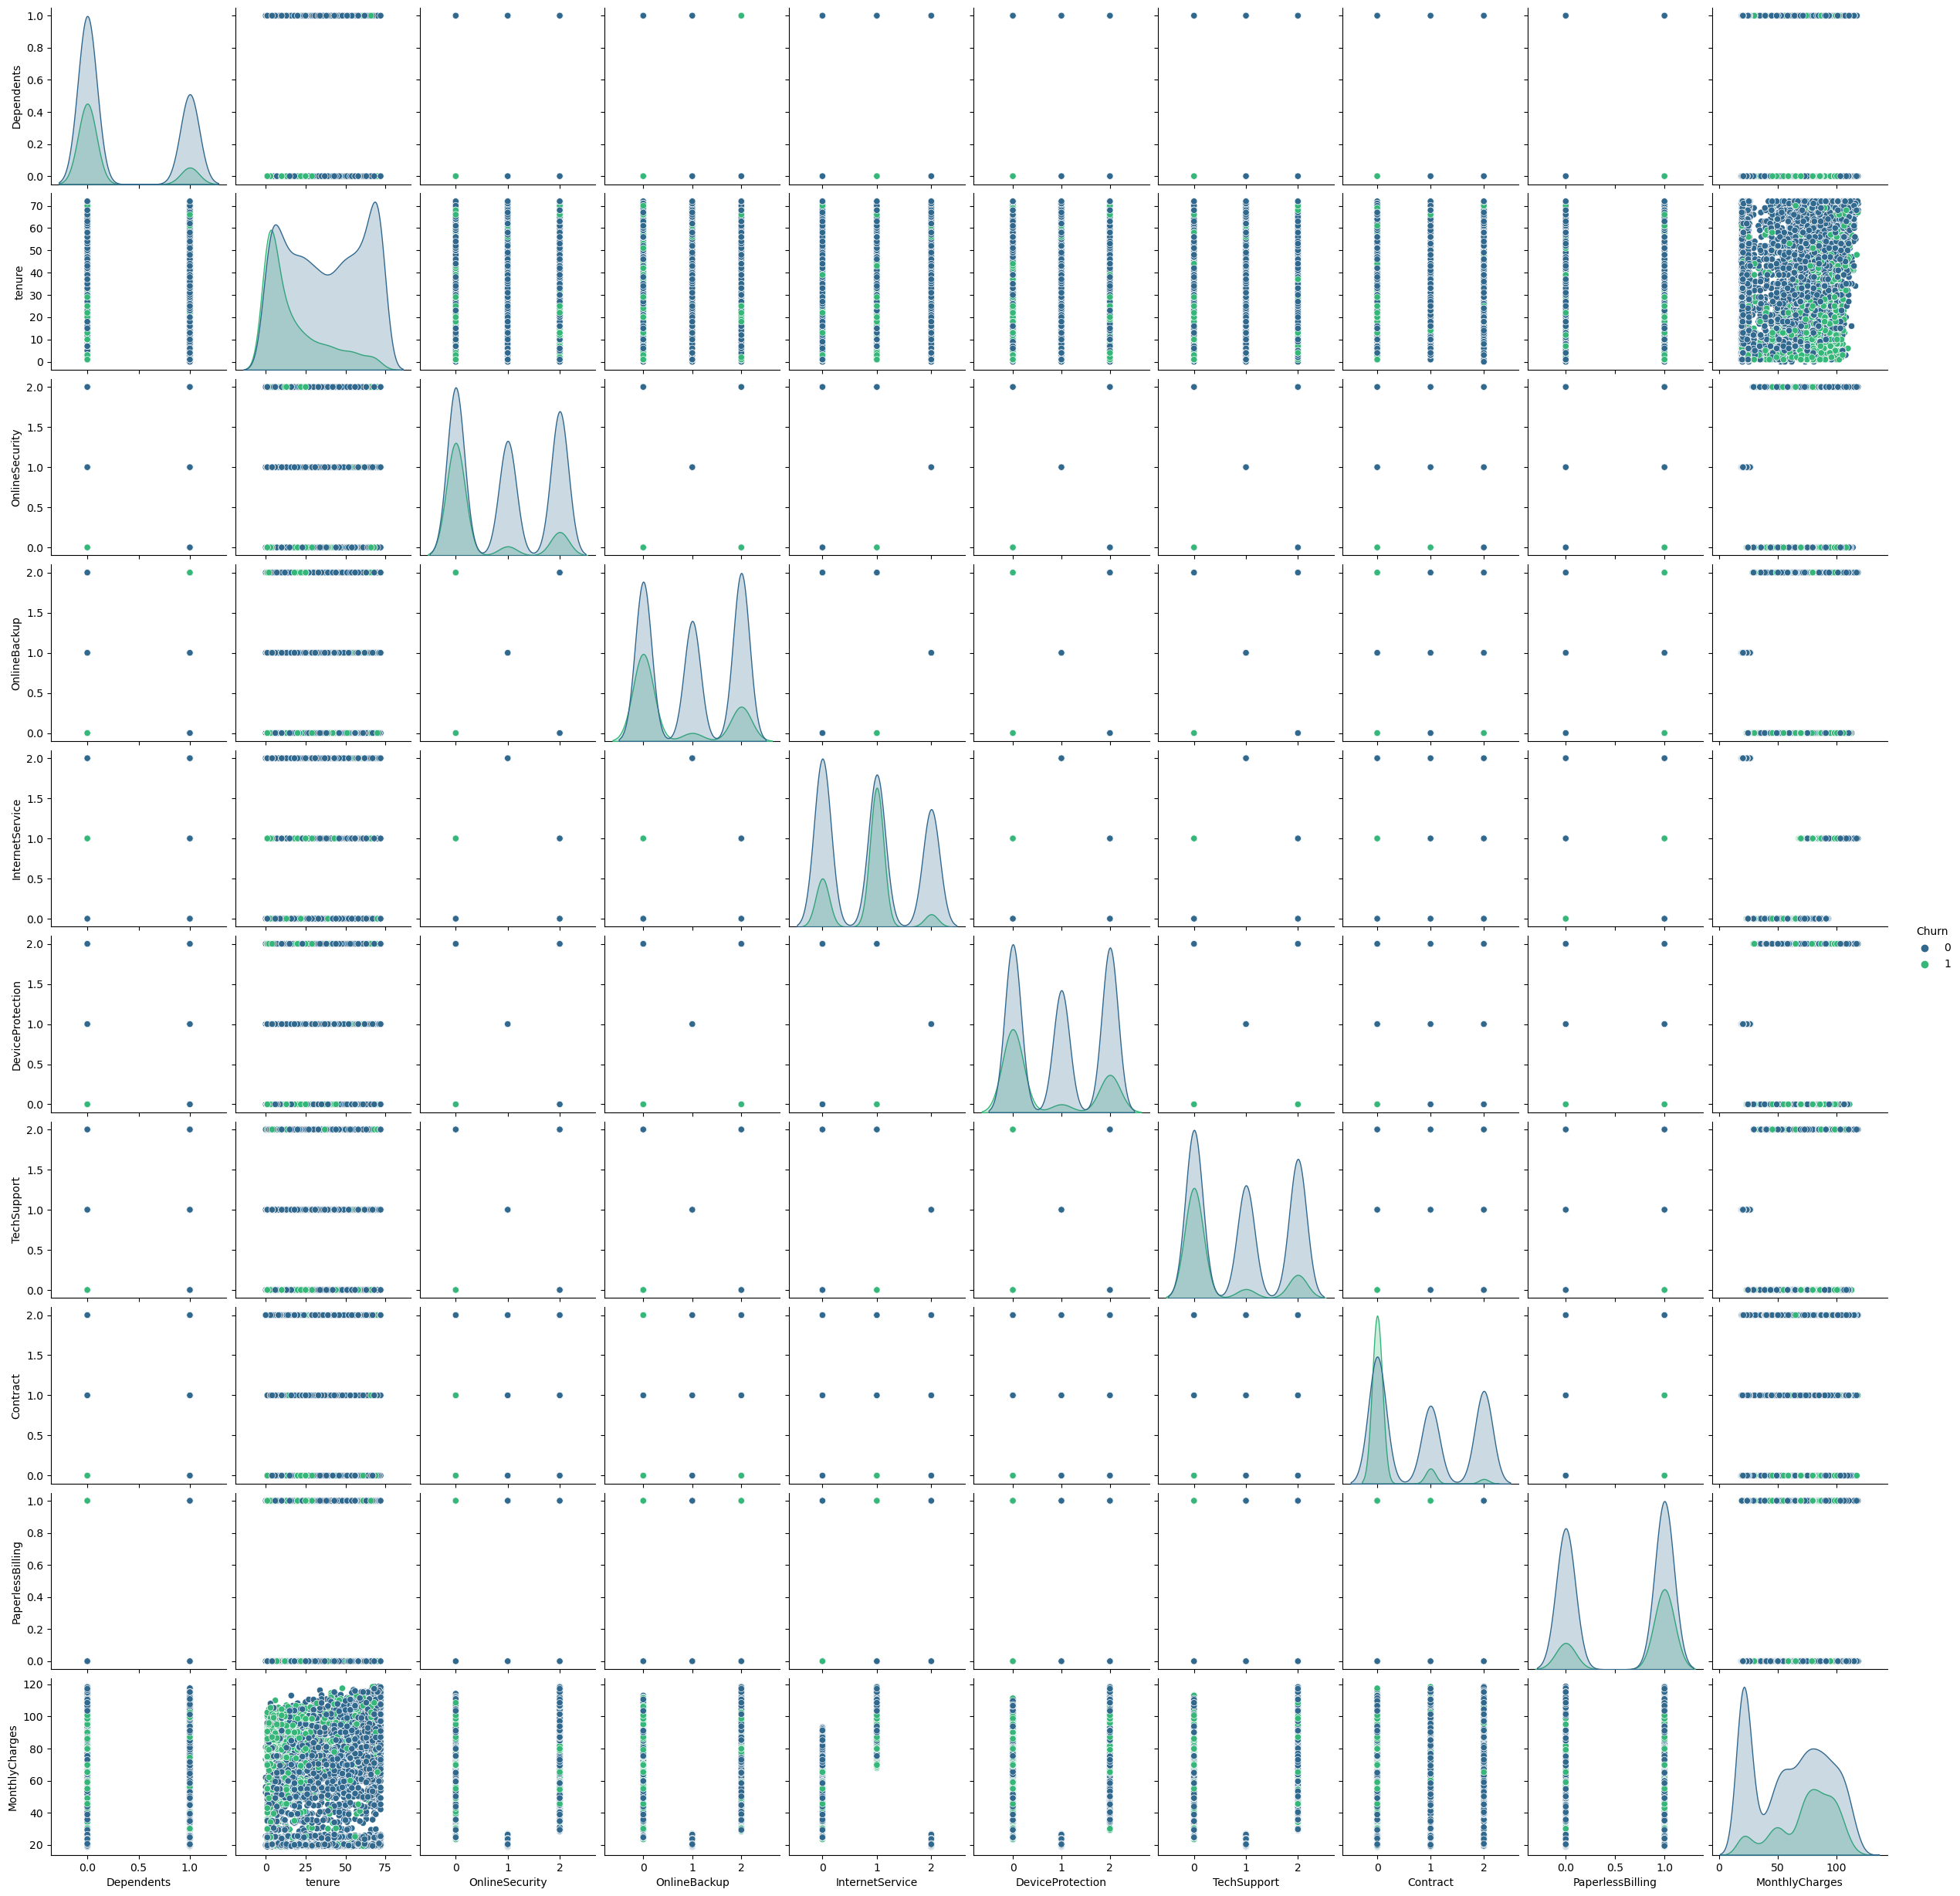

In [110]:
sns.pairplot(df, hue='Churn', palette='viridis')
plt.show()

In [112]:
# Summary statistics for numerical features grouped by target variable
print(df.groupby('Churn').mean())

# Summary statistics for categorical features grouped by target variable
for col in categorical_features:
    print(df.groupby('Churn')[col].value_counts(normalize=True))

       Dependents     tenure  OnlineSecurity  OnlineBackup  InternetService  \
Churn                                                                         
0        0.348367  37.763697        0.944106      1.019369         0.884339   
1        0.170973  17.674772        0.384498      0.592705         0.820669   

       DeviceProtection  TechSupport  Contract  PaperlessBilling  \
Churn                                                              
0              0.992806     0.930825  0.884339          0.543996   
1              0.644377     0.387538  0.129179          0.753040   

       MonthlyCharges  
Churn                  
0           61.396541  
1           74.457637  


## HEATMAP

Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

- -1 - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
- 0 - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
- 1 - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

                  Dependents    tenure  OnlineSecurity  OnlineBackup  \
Dependents          1.000000  0.154827        0.154586      0.084881   
tenure              0.154827  1.000000        0.319956      0.370857   
OnlineSecurity      0.154586  0.319956        1.000000      0.181366   
OnlineBackup        0.084881  0.370857        0.181366      1.000000   
InternetService     0.017940 -0.040522       -0.035849      0.028805   
DeviceProtection    0.076124  0.364443        0.171425      0.201321   
TechSupport         0.135063  0.324569        0.277854      0.197816   
Contract            0.243351  0.671364        0.367844      0.280817   
PaperlessBilling   -0.109301  0.005435       -0.167463     -0.017133   
MonthlyCharges     -0.111378  0.240244       -0.056241      0.115627   
Churn              -0.171076 -0.362734       -0.286902     -0.214023   

                  InternetService  DeviceProtection  TechSupport  Contract  \
Dependents               0.017940          0.076124     0

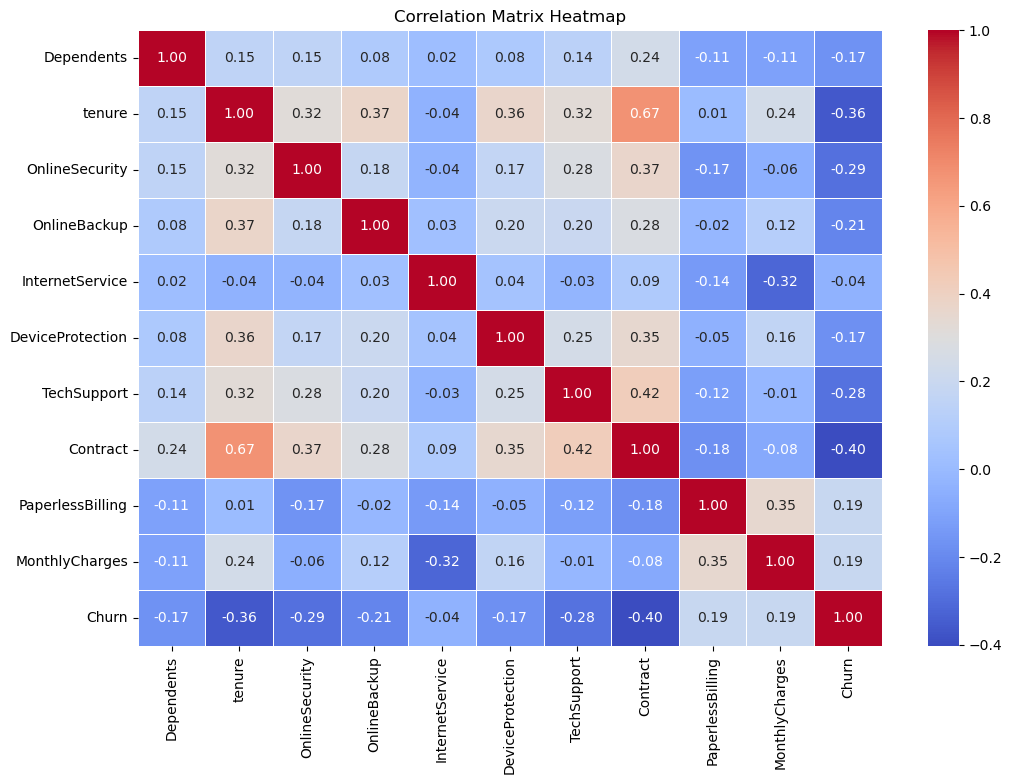

In [113]:
df = pd.DataFrame(df_model)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Conclusion & Recommendation

Berdasarkan data diatas dapat disimpulkan bahwa jika menggunakan model ini maka perusahaan dapat melakukan penyaringan untuk pelanggan yang terindikasi melakukan churn atau tidak dan dapat memberikan diskon atau pelayanan khusus untuk pelanggan yang terindikasi akan melakukan churn